<font size=6><b>lec. 금융 관련 API

* PyKRX
    * https://github.com/sharebook-kr/pykrx
* pandas_datareader + yfinance
* finance_datareader
* TA-LIB
* quandle

# pykrx

# 주식관련

In [1]:
# ! pip install pykrx

In [2]:
from pykrx import stock
from pykrx import bond

In [3]:
#KOSPI*, KOSDAQ, KONEX, ALL
tickers = stock.get_market_ticker_list("20190225", market="KOSDAQ")
print(tickers[:5] , len(tickers))

['060310', '054620', '265520', '211270', '035760'] 1328


In [4]:
tickers = stock.get_market_ticker_list("20190225")
print(tickers[:5] , len(tickers))

['095570', '068400', '006840', '027410', '282330'] 901


In [5]:
tickers = stock.get_market_ticker_list("20190225", market="ALL")
print(tickers[:5] , len(tickers))

['060310', '095570', '068400', '006840', '054620'] 2382


In [6]:
종목 = stock.get_market_ticker_name('005930')
print(종목)

삼성전자


In [7]:
for tcode in ['095570', '068400', '006840', '027410', '282330'] :
    종목 = stock.get_market_ticker_name(tcode)
    print(tcode, 종목)

095570 AJ네트웍스
068400 SK렌터카
006840 AK홀딩스
027410 BGF
282330 BGF리테일


In [8]:
df = stock.get_market_ohlcv("20150720", "20150810", "005930")
print(df.shape)
print(df.head(3))

(16, 5)
               시가     고가     저가     종가     거래량
날짜                                            
2015-07-20  25820  26080  25460  25500  128928
2015-07-21  25500  25540  24940  25260  194055
2015-07-22  24880  25200  24700  25060  268323


In [9]:
# 월단위 :  frequency 파라미터(d/m/y)
df = stock.get_market_ohlcv("20180810", "20181212", "005930", "m")
print(df.head(3))

               시가     고가     저가     종가        거래량
날짜                                               
2018-08-31  46150  48450  43500  48450  135518029
2018-09-30  48200  48300  44000  46450  197984482
2018-10-31  46450  46800  40400  42400  234645485


In [10]:
import time
for i in range(3):
    print(i)
    time.sleep(0.5)

0
1
2


In [11]:
# 일별 거래량 거래대금
df = stock.get_market_price_change("20180301", "20180320")
print(df.head(2))

           종목명     시가     종가   변동폭    등락률      거래량         거래대금
티커                                                             
095570  AJ네트웍스   7550   7130  -420  -5.56   384948   2844218890
068400   AJ렌터카  10900  12100  1200  11.01  3410074  40045884150


c:\ai\pythonproject7\venv\lib\site-packages\pykrx\stock\api.py:633: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_0 = df_0.append(df_1[cond])


## 순매수 거래금액

In [12]:
# df = stock.get_market_trading_value_by_date("20210115", "20210122", "005930", on='매도')
# df = stock.get_market_trading_value_by_date("20210115", "20210122", "005930")
# df = stock.get_market_trading_value_by_date("20210115", "20210122", "005930",etf=True, etn=True, elw=True)
df = stock.get_market_trading_value_by_date("20210115", "20210122", "KOSPI", etf=True, etn=True, elw=True, detail=True)
print(df.head())

                     금융투자            보험            투신           사모  \
날짜                                                                   
2021-01-15  -991569370471 -101879326615  -73654664921 -47097103944   
2021-01-18  -234901037556  -72240710086  101791257920 -22451555756   
2021-01-19  1095649201830  -16407303019 -132856710155  12116061569   
2021-01-20  -642974676550  -63074125224  -93392192931  -2355882539   
2021-01-21   354360314201 -107524405663  -12601355617  21898580074   

                      은행          기타금융           연기금         기타법인  \
날짜                                                                  
2021-01-15  202104737955   -4226413080 -520248168365  63110174617   
2021-01-18   29622542645    9331964150 -412580572674 -27000808439   
2021-01-19    1776752770   -1933723125 -413689873532  21787409868   
2021-01-20  -17889264145   -1573759250 -406382571980  32139813590   
2021-01-21 -113225122905 -158268629075 -269539273337 -19072459127   

                       개인

## 거래량

In [13]:
df = stock.get_market_trading_volume_by_date("20210115", "20210122", "005930")
print(df.head())

               기관합계    기타법인       개인    외국인합계  전체
날짜                                               
2021-01-15 -5006115  288832  7485785 -2768502   0
2021-01-18   505669  262604   151228  -919501   0
2021-01-19  1139258  -34023 -2044543   939308   0
2021-01-20 -4157919  262408  4917655 -1022144   0
2021-01-21  -712099 -321732  2890389 -1856558   0


In [14]:
# 상폐종목
# 종가가 0, 등락폭이 -100%

In [15]:
# 대체 데이터 
# df = stock.get_market_fundamental("20210108")
df = stock.get_market_fundamental("20210104", "20210108", "005930")
print(df.head(2))

              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2021-01-04  37528  26.22  2.21  3166  1.71  1416
2021-01-05  37528  26.50  2.24  3166  1.69  1416


In [16]:
# 2.1.1.9 투자자별 거래실적 추이 (거래대금)
df = stock.get_market_trading_value_by_investor("20210115", "20210122", "005930")
# df = stock.get_market_trading_volume_by_investor("20210115", "20210122", "005930")
print(df.head())

                  매도             매수           순매수
투자자구분                                            
금융투자   2580964135000  2309054317700 -271909817300
보험      153322228800    44505136200 -108817092600
투신      258073006600   150715203700 -107357802900
사모       65167773900    60862926800   -4304847100
은행        3369626100     4004806100     635180000


## 중요 - 투자자별매매동향

In [17]:
# 금융투자 / 보험 / 투신 / 사모 / 은행 / 기타금융 / 연기금 / 기관합계 / 기타법인 / 개인 / 외국인 / 기타외국인 / 전체
# 투자자별 순매수 상위종목
# 투자종목소팅 + ohlcv
df = stock.get_market_net_purchases_of_equities("20210115", "20210122", "KOSPI", "개인")
print(df.head())

            종목명     매도거래량      매수거래량    순매수거래량         매도거래대금         매수거래대금  \
티커                                                                             
005930     삼성전자  79567418  102852747  23285329  6918846810800  8972911580500   
000270      기아차  44440252   49880626   5440374  3861283906400  4377698855000   
005935    삼성전자우  15849762   20011325   4161563  1207133611400  1528694164400   
051910     LG화학    709872     921975    212103   700823533000   908593419000   
096770  SK이노베이션   4848359    5515777    667418  1298854139000  1478890602000   

              순매수거래대금  
티커                     
005930  2054064769700  
000270   516414948600  
005935   321560553000  
051910   207769886000  
096770   180036463000  


In [18]:
# 종목별 시가 총액 조회 , 외인D-2

# df = stock.get_market_cap("20200625")
# df = stock.get_market_cap("20190101", "20190131", "005930")
df = stock.get_market_cap("20200101", "20200430", "005930", "m")

print(df.head())

                       시가총액        거래량            거래대금       상장주식수
날짜                                                                
2020-01-31  336695735820000  319891636  18809460519447  5969782550
2020-02-29  323562214210000  360007160  21055346438502  5969782550
2020-03-31  285057116762500  856741868  42269216023680  5969782550
2020-04-30  298489127500000  424101937  20785194256247  5969782550


# 섹터(지수)

In [19]:
tickers = stock.get_index_ticker_list("202000408", market='KOSDAQ')
print(tickers)

['2001', '2002', '2003', '2004', '2012', '2015', '2024', '2026', '2027', '2029', '2031', '2037', '2041', '2042', '2043', '2056', '2058', '2062', '2063', '2065', '2066', '2067', '2068', '2070', '2072', '2074', '2075', '2077', '2151', '2152', '2153', '2154', '2155', '2156', '2157', '2158', '2159', '2160', '2181', '2182', '2183', '2184', '2203', '2212', '2213', '2214', '2215', '2216', '2217', '2218']


## 종목별 섹터확인

In [20]:
for ticker in stock.get_index_ticker_list("20220919", market='KOSDAQ'):
    print(ticker, stock.get_index_ticker_name(ticker))

2001 코스닥
2002 코스닥 대형주
2003 코스닥 중형주
2004 코스닥 소형주
2012 기타서비스
2015 코스닥 IT
2024 제조업
2026 건설
2027 유통
2029 운송
2031 금융
2037 오락·문화
2041 통신방송서비스
2042 IT S/W & SVC
2043 IT H/W
2056 음식료·담배
2058 섬유·의류
2062 종이·목재
2063 출판·매체복제
2065 화학
2066 제약
2067 비금속
2068 금속
2070 기계·장비
2072 일반전기전자
2074 의료·정밀기기
2075 운송장비·부품
2077 기타제조
2151 통신서비스
2152 방송서비스
2153 인터넷
2154 디지털컨텐츠
2155 소프트웨어
2156 컴퓨터서비스
2157 통신장비
2158 정보기기
2159 반도체
2160 IT부품
2181 코스닥 우량기업부
2182 코스닥 벤처기업부
2183 코스닥 중견기업부
2184 코스닥 기술성장기업부
2203 코스닥 150
2212 코스닥 150 소재
2213 코스닥 150 산업재
2214 코스닥 150 필수소비재
2215 코스닥 150 자유소비재
2216 코스닥 150 정보기술
2217 코스닥 150 헬스케어
2218 코스닥 150 커뮤니케이션서비스


# [Quiz] 코스닥.. 외국인 거래대금 가장많은 철강금속 top10 조회

In [21]:
import pandas as  pd
# 금융투자 / 보험 / 투신 / 사모 / 은행 / 기타금융 / 연기금 / 기관합계 / 기타법인 / 개인 / 외국인 / 기타외국인 / 전체
# 투자자별 순매수 상위종목
# 투자종목소팅 + ohlcv
df_외국인 = stock.get_market_net_purchases_of_equities("20220919","20220919", "KOSDAQ", "외국인")
df_기타외국인 = stock.get_market_net_purchases_of_equities("20220919", "20220919", "KOSDAQ", "기타외국인")

mgdf = pd.merge(df_외국인, df_기타외국인, left_index=True, right_index=True)
# mgdf.head()
mgdf[['종목명_x','순매수거래대금_x', '순매수거래대금_y']].head()
mgdf['순매수거래대금'] = mgdf['순매수거래대금_x'] + mgdf['순매수거래대금_y']

mgdf[['종목명_x','순매수거래대금']].head()

,종목명_x,순매수거래대금
티커,,
086520,에코프로,11621924800
247540,에코프로비엠,11049070800
035900,JYP Ent.,5972075200
365340,성일하이텍,5907902000
323990,박셀바이오,4756663700


In [22]:
# for ticker in stock.get_index_ticker_list("20220917", market='KOSDAQ'):  #2068 금속
#     print(ticker, stock.get_index_ticker_name(ticker))

In [47]:
금속_ticer_list = stock.get_index_portfolio_deposit_file("2066") #2068 금속
print(len(금속_ticer_list), 금속_ticer_list)

110 ['068760', '237690', '214370', '096530', '145020', '007390', '195940', '298380', '085660', '086450', '086900', '000250', '200130', '064550', '214450', '182400', '290650', '039200', '102940', '206650', '099430', '256840', '041960', '307750', '205470', '053030', '243070', '310210', '058820', '048530', '246710', '340570', '174900', '078160', '032300', '314130', '216080', '084110', '263050', '011040', '206640', '228760', '086890', '067080', '138610', '200670', '334970', '288330', '049180', '220100', '060590', '006620', '187420', '087010', '251120', '067290', '061250', '023910', '166480', '308080', '054670', '244460', '066700', '234690', '191420', '100700', '142280', '175250', '153710', '241820', '072020', '217730', '001540', '086820', '049960', '225220', '131030', '012790', '330350', '042520', '304840', '009300', '041910', '260660', '078140', '208340', '014570', '298060', '034940', '007370', '002800', '200780', '106190', '222110', '114450', '053950', '331920', '307280', '018620', '0526

In [48]:
mgdf[mgdf.index.isin(금속_ticer_list)][['종목명_x','순매수거래대금']].sort_values("순매수거래대금").head(10)

,종목명_x,순매수거래대금
티커,,
099430,바이오플러스,-2833939150
064550,바이오니아,-2120729750
007390,네이처셀,-2096739600
086900,메디톡스,-1197879700
068760,셀트리온제약,-793345900
307750,국전약품,-752090040
290650,엘앤씨바이오,-714844200
000250,삼천당제약,-697127950
085660,차바이오텍,-565902050


* by 인서

In [ ]:
# stock_dict = {}
# for ticker_code in stock.get_index_portfolio_deposit_file("2068"):  #62개 티거
#     df = stock.get_market_trading_value_by_investor(fromdate = '20220919',todate = '20220919',ticker=ticker_code)
#     stock_dict[stock.get_market_ticker_name(ticker_code)] = df.loc[['외국인', '기타외국인'], '순매수'].sum()
# dict(sorted(stock_dict.items(), key=lambda item: item[1], reverse=True)) #[-10:])


# [Quiz] KOSPI 오늘 날짜 기준 최대 거래량 섹터/종목 top5

* 섹터

In [49]:
df = stock.get_index_price_change("20220919", "20220919", "KOSPI")
df.sort_values('거래량', ascending=False).head(30)

,시가,종가,등락률,거래량,거래대금
지수명,,,,,
코스피,2382.78,2355.66,-1.139648,403937473,6885918719312
코스피200제외 코스피지수,3122.15,3069.23,-1.690430,299785102,1970185439710
제조업,6198.82,6130.61,-1.099609,298743605,5230833176393
코스피 소형주,2293.15,2246.64,-2.029297,268078173,1411668410445
코스피 200,308.69,306.49,-0.709961,101185844,4835820924025
코스피 200 비중상한 20%,299.79,297.31,-0.830078,101185844,4835820924025
코스피 200 비중상한 25%,306.24,303.91,-0.759766,101185844,4835820924025
코스피 200 비중상한 30%,308.13,305.94,-0.709961,101185844,4835820924025
코스피 200 초대형제외 지수,233.42,230.85,-1.099609,88907191,4142184244025


* 종목

In [50]:
df = stock.get_market_ohlcv("20220919", market="KOSPI")
topdf = df['거래량'].sort_values(ascending=False).head()
print(topdf.head())

for ticker in topdf.index:
    종목 = stock.get_market_ticker_name(ticker)
    print(ticker , 종목, topdf.loc[ticker])

티커
018470    34180107
091090    24383139
006220    18676425
014580    12872356
005930    12278653
Name: 거래량, dtype: int32
018470 조일알미늄 34180107
091090 세원이앤씨 24383139
006220 제주은행 18676425
014580 태경비케이 12872356
005930 삼성전자 12278653


# 지수(index fund)
* ETF 
* ETN
* ELW

# 채권(bond)

In [51]:
from pykrx import bond

In [52]:
df = bond.get_otc_treasury_yields("20220919")
print(df)

                      수익률     대비
채권종류                            
국고채 1년              3.194 -0.017
국고채 2년              3.764  0.018
국고채 3년              3.759 -0.008
국고채 5년              3.782  0.015
국고채 10년             3.794  0.022
국고채 20년             3.668  0.000
국고채 30년             3.608  0.022
국민주택 1종 5년          3.875  0.023
회사채 AA-(무보증 3년)     4.751 -0.007
회사채 BBB- (무보증 3년)  10.609 -0.005
CD(91일)             2.990  0.020


## 중요 - 일자별 채권 금리

In [53]:
df = bond.get_otc_treasury_yields("20220104", "20220204", "국고채2년")
print(df.head())

              수익률     대비
일자                      
2022-01-04  1.717  0.007
2022-01-05  1.791  0.074
2022-01-06  1.878  0.087
2022-01-07  1.895  0.017
2022-01-10  1.902  0.007


In [ ]:
#TA-LIB
# !pip install .\ta_lib-0.4.24-cp38-cp38-win_amd64.whl
# !pip install pandas_datareader 
# !pip install finance_datareader
# !pip install quandl
# !pip install plotly
# #구버전.. yahoo-finace
# !pip install yfinance  

# YahooFinance
* ref : https://pypi.org/project/yfinance/

In [54]:
# import yfinance as yf
# msft = yf.Ticker("MSFT")
# msft.info

In [55]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
df = pdr.get_data_yahoo("GOOG", start="2020-01-01", end="2020-02-28")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000


In [56]:
df = pdr.get_data_yahoo("005930.KS", start="2020-01-01", end="2020-02-28")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,51244.257812,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,51522.757812,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,51522.757812,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,51801.261719,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,52729.597656,23501171


# pandas-datareader
* https://pandas-datareader.readthedocs.io/en/latest/

<pre>
<div>
                
  <div class="section" id="data-readers">
<h1>Data Readers<a class="headerlink" href="#data-readers" title="Permalink to this headline">¶</a></h1>
<div class="toctree-wrapper compound">
<ul>
<li class="toctree-l1"><a class="reference internal" href="alphavantage.html">AlphaVantage</a></li>
<li class="toctree-l1"><a class="reference internal" href="fred.html">Federal Reserve Economic Data (FRED)</a></li>
<li class="toctree-l1"><a class="reference internal" href="famafrench.html">Fama-French Data (Ken French’s Data Library)</a></li>
<li class="toctree-l1"><a class="reference internal" href="bank-of-canada.html">Bank of Canada</a></li>
<li class="toctree-l1"><a class="reference internal" href="econdb.html">Econdb</a></li>
<li class="toctree-l1"><a class="reference internal" href="enigma.html">Enigma</a></li>
<li class="toctree-l1"><a class="reference internal" href="eurostat.html">Eurostat</a></li>
<li class="toctree-l1"><a class="reference internal" href="iex.html">The Investors Exchange (IEX)</a></li>
<li class="toctree-l1"><a class="reference internal" href="moex.html">Moscow Exchange (MOEX)</a></li>
<li class="toctree-l1"><a class="reference internal" href="nasdaq-trader.html">NASDAQ</a></li>
<li class="toctree-l1"><a class="reference internal" href="naver.html">Naver Finance</a></li>
<li class="toctree-l1"><a class="reference internal" href="oecd.html">Organisation for Economic Co-operation and Development (OECD)</a></li>
<li class="toctree-l1"><a class="reference internal" href="quandl.html">Quandl</a></li>
<li class="toctree-l1"><a class="reference internal" href="stooq.html">Stooq.com</a></li>
<li class="toctree-l1"><a class="reference internal" href="tiingo.html">Tiingo</a></li>
<li class="toctree-l1"><a class="reference internal" href="tsp.html">Thrift Savings Plan (TSP)</a></li>
<li class="toctree-l1"><a class="reference internal" href="world-bank.html">World Bank</a></li>
<li class="toctree-l1"><a class="reference internal" href="yahoo.html">Yahoo Finance</a></li>
</ul>
</div>
</div>


              </div>

In [27]:
#미국채권
import pandas_datareader as pdr
pdr.get_data_fred('GS10').head()

,GS10
DATE,
2017-10-01,2.36
2017-11-01,2.35
2017-12-01,2.40
2018-01-01,2.58
2018-02-01,2.86


In [28]:
df = pdr.get_data_yahoo("005930.KS", "2020-01-01", "2020-02-28")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000,55000,55500,55200,12993228,51244.257812
2020-01-03,56600,54900,56000,55500,15422255,51522.753906
2020-01-06,55600,54600,54900,55500,10278951,51522.753906
2020-01-07,56400,55600,55700,55800,10009778,51801.257812
2020-01-08,57400,55900,56200,56800,23501171,52729.601562


# TA-LIB
* ref : https://github.com/mrjbq7/ta-lib

In [25]:
import talib

In [29]:
df = pdr.get_data_yahoo("005930.KS", "2020-01-01", "2020-02-28")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000,55000,55500,55200,12993228,51244.253906
2020-01-03,56600,54900,56000,55500,15422255,51522.757812
2020-01-06,55600,54600,54900,55500,10278951,51522.757812
2020-01-07,56400,55600,55700,55800,10009778,51801.261719
2020-01-08,57400,55900,56200,56800,23501171,52729.593750


In [30]:
df["ma5"] = df['Close'].rolling(5).mean()
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,ma5
Date,,,,,,,
2020-01-02,56000,55000,55500,55200,12993228,51244.253906,NaN
2020-01-03,56600,54900,56000,55500,15422255,51522.757812,NaN
2020-01-06,55600,54600,54900,55500,10278951,51522.757812,NaN
2020-01-07,56400,55600,55700,55800,10009778,51801.261719,NaN
2020-01-08,57400,55900,56200,56800,23501171,52729.593750,55760.0
2020-01-09,58600,57400,58400,58600,24102579,54400.605469,56440.0
2020-01-10,59700,58300,58800,59500,16000170,55236.105469,57240.0
2020-01-13,60000,59100,59600,60000,11359139,55700.277344,58140.0
2020-01-14,61000,59900,60400,60000,16906295,55700.277344,58980.0


In [31]:
df["tb-ma5"] = talib.SMA(df["Close"], timeperiod=5)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,ma5,tb-ma5
Date,,,,,,,,
2020-01-02,56000,55000,55500,55200,12993228,51244.253906,NaN,NaN
2020-01-03,56600,54900,56000,55500,15422255,51522.757812,NaN,NaN
2020-01-06,55600,54600,54900,55500,10278951,51522.757812,NaN,NaN
2020-01-07,56400,55600,55700,55800,10009778,51801.261719,NaN,NaN
2020-01-08,57400,55900,56200,56800,23501171,52729.593750,55760.0,55760.0
2020-01-09,58600,57400,58400,58600,24102579,54400.605469,56440.0,56440.0
2020-01-10,59700,58300,58800,59500,16000170,55236.105469,57240.0,57240.0
2020-01-13,60000,59100,59600,60000,11359139,55700.277344,58140.0,58140.0
2020-01-14,61000,59900,60400,60000,16906295,55700.277344,58980.0,58980.0


In [32]:
from talib import MA_Type
upper, middle, lower = talib.BBANDS(df["Close"], matype=MA_Type.T3)
# upper, middle, lower 

In [33]:
df["upperband"], df["middleband"], df["lowerband"] = talib.BBANDS(df["Close"], timeperiod=5)
df.head()

,High,Low,Open,Close,Volume,Adj Close,ma5,tb-ma5,upperband,middleband,lowerband
Date,,,,,,,,,,,
2020-01-02,56000,55000,55500,55200,12993228,51244.253906,NaN,NaN,NaN,NaN,NaN
2020-01-03,56600,54900,56000,55500,15422255,51522.757812,NaN,NaN,NaN,NaN,NaN
2020-01-06,55600,54600,54900,55500,10278951,51522.757812,NaN,NaN,NaN,NaN,NaN
2020-01-07,56400,55600,55700,55800,10009778,51801.261719,NaN,NaN,NaN,NaN,NaN
2020-01-08,57400,55900,56200,56800,23501171,52729.593750,55760.0,55760.0,56867.0682,55760.0,54652.9318


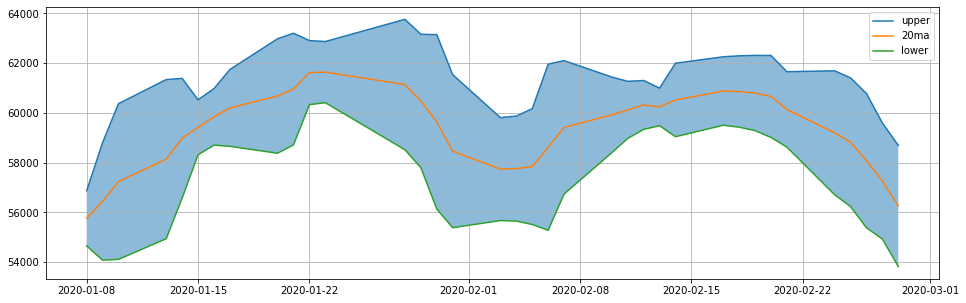

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.plot(df["upperband"] , label="upper")
plt.plot(df["middleband"], label="20ma")
plt.plot(df["lowerband"], label="lower")
plt.fill_between(df.index,df["upperband"], df["lowerband"], alpha=0.5)
plt.legend()
plt.grid()
plt.show()


<Figure size 1600x500 with 0 Axes>

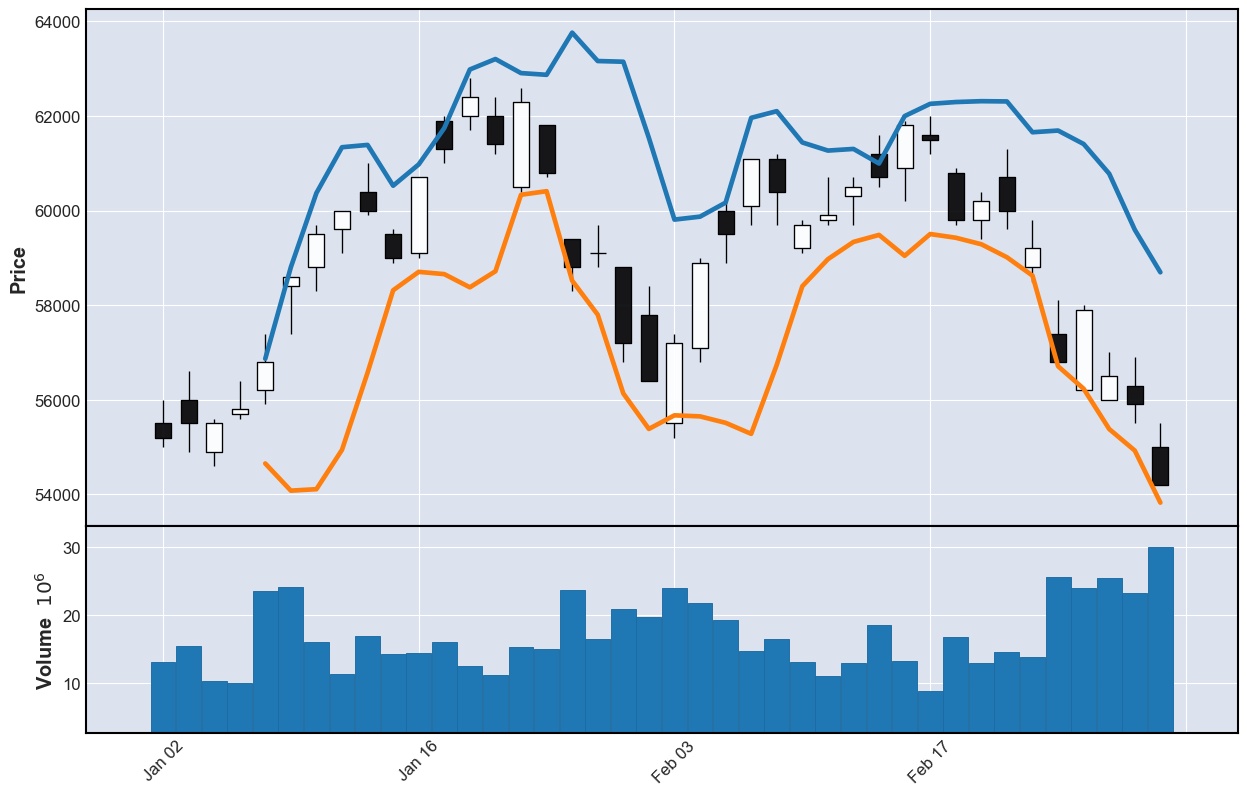

In [46]:
import tkinter as tk
import matplotlib as matplotlib
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import mplfinance as mpf

plt.figure(figsize=(16,5))

mpfBB = mpf.make_addplot(df[["upperband", "lowerband"]])
addedPlots = [mpfBB]

# Generate the plots and and return the figure
fig, _ = mpf.plot(df, type='candlestick', volume=True, returnfig=True, addplot=addedPlots, figscale=2.0)

# Add a canvas containing the figure
top = tk.Toplevel()
canvas = FigureCanvasTkAgg(fig, top)

# Draw it
canvas.draw()
canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

In [ ]:
# !pip install mplfinance

In [ ]:
# candlestick2_ohlc(df.index, df['opens', 'highs', 'lows','closes')

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX finance_datareader
* 한국주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 
*FinanceDataReader는 pandas-datareader 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다.
* 거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500
* https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [ ]:
#!pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr

<pre>
한국심볼	거래소
KRX	KRX 종목 전체
KOSPI	KOSPI 종목
KOSDAQ	KOSDAQ 종목
KONEX	KONEX 종목

미국심볼	거래소
NASDAQ	나스닥 종목
NYSE	뉴욕 증권거래소 종목
AMEX	AMEX 종목
SP500	S&P 500 종목

한국지수심볼	설명
KS11	KOSPI 지수
KQ11	KOSDAQ 지수
KS50	KOSPI 50 지수
KS100	KOSPI 100
KRX100	KRX 100
KS200	코스피 200

미국지수심볼	설명
DJI	다우존스 지수
IXIC	나스닥 지수
US500	S&P 500 지수
VIX	S&P 500 VIX

국제지수심볼	설명
JP225	닛케이 225 선물
STOXX50E	Euro Stoxx 50
CSI300	CSI 300 (중국)
HSI	항셍 (홍콩)
FTSE	영국 FTSE
DAX	독일 DAX 30
CAC	프랑스 CAC 40

In [ ]:
df_krx = fdr.StockListing('NASDAQ')
df_krx.head()

In [ ]:
df_krx = fdr.StockListing('KOSPI')
df_krx.head()

In [ ]:
# # 애플(AAPL), 2018-01-01 ~ 2018-03-30
# # df = fdr.DataReader('AAPL', '2018')
# df = fdr.DataReader('GOOG', '2018-01-01', '2018-03-30')
# # df.tail()

## 환율
<pre>
심볼	설명
USD/KRW	달러당 원화 환율
USD/EUR	달러당 유로화 환율
USD/JPY	달러당 엔화 환율
CNY/KRW	위엔화 원화 환율
EUR/USD	유로화 달러 환율
USD/JPY	달러 엔화 환율
JPY/KRW	엔화 원화 환율
AUD/USD	오스트레일리아 달러 환율
EUR/JPY	유로화 엔화 환율
USD/RUB	달러 루블화

## 암호화폐
<pre>
암호화폐 가격 (KRW)
암호 화폐 원화 가격 (빗썸)

심볼	설명
BTC/KRW	비트코인 원화 가격
ETH/KRW	이더리움 원화 가격
XRP/KRW	리플 원화 가격
BCH/KRW	비트코인 캐시 원화 가격
EOS/KRW	이오스 원화 가격
LTC/KRW	라이트 코인 원화 가격
XLM/KRW	스텔라 원화 가격
암호화폐 가격 (UDS)
암호 화폐 달러화 가격 (Bitfinex)

심볼	설명
BTC/USD	비트코인 달러 가격
ETH/USD	이더리움 달러 가격
XRP/USD	리플 달러 가격
BCH/USD	비트코인 캐시 달러 가격
EOS/USD	이오스 달러 가격
LTC/USD	라이트 코인 달러 가격
XLM/USD	스텔라 달러 가격
암호화폐 선물
심볼	설명
BTC	비트코인 CME 선물
